> # Linear Regression  

In this notebook, i well predect the price of the house using the Linear Regression model. `without use` any machine learning library.

## 1- Package

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipympl
import pandas as pd

from   sympy import *

%matplotlib widget

## 2- import data

In [3]:
path = './data/Housing_2par.csv'

data = pd.read_csv(path)

data.head()

,price,area
0,13300000.0,7420
1,12250000.0,8960
2,12250000.0,9960
3,12215000.0,7500
4,11410000.0,7420


<Axes: xlabel='area', ylabel='price'>

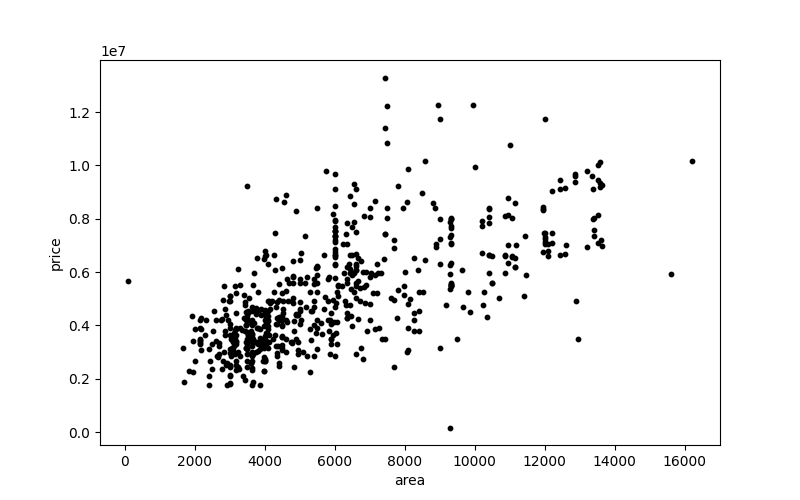

In [4]:
data.plot(x='area', y='price', style='o',kind='scatter', c='black',s=10,figsize=(8,5))

In [5]:
X = data['area'].values
Y = data['price'].values

X = np.array(X)
Y = np.array(Y)

std_X = np.std(X)
mean_X = np.mean(X)

nrm_x = (X - np.mean(X)) / np.std(X)
nrm_y = (Y - np.mean(Y)) / np.std(Y) 


## 3- Gredient Descent Method

### 3.1- loss Function

$$
f(m,b) = mx_{i}+b - y_{i}
$$

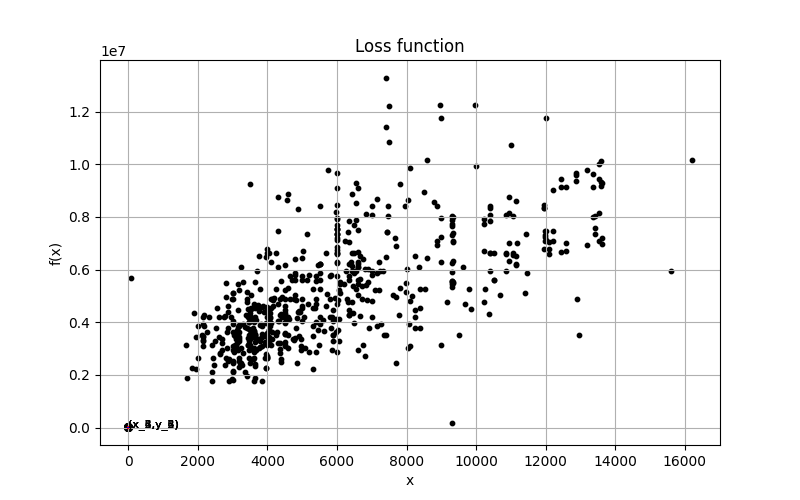

In [6]:
x = np.linspace(0, 10)
p = np.array([[0,1,4,4.5,5,8],[2,4,2,4.5,8,7.6]])
y = x

plt.plot(x, y,c="red")
plt.scatter(p[0],p[1],c='black',s=30)

for i in range(len(p[0])):
    plt.text(p[0][i]-0.5, p[1][i]+0.3, f'(x_{i+1},y_{i+1})', fontsize=8)
    plt.plot([p[0][i], p[0][i]], [p[1][i], p[0][i]], c='blue', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Loss function')
plt.grid(True)
plt.show()

evry blue line represents a loss function for each point, the sum of all the loss functions is the cost function.

$$\therefore Loss\left(m, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2 \Rightarrow Loss(m,b) = mx_{i}+b - y_{i}$$
$$

$$

$$Cost\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(Loss(m,b)_i\right)^2 = 
\frac{1}{2n}\sum_{i=1}^{n} \left(mx_i+b - y_i\right)^2,\tag{1}$$

note : the 2 in the denominator is for the simplification of the derivative.

\begin{align}

\frac{\partial C }{ \partial m } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx_i+b - y_i\right)x_i,\\
\frac{\partial C }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx_i+b - y_i\right),
\tag{2}\end{align}


\begin{align}
\begin{cases}
m &= m - \alpha \frac{\partial C }{ \partial m },\\
b &= b - \alpha \frac{\partial C }{ \partial b },
\end{cases}
\tag{4}\end{align}


In [10]:
# in the first time we set a random m & b

def loss_function(m,b,x,y):
    return y - (m*x + b)

def cost_function(m, b, x, y):
    
    n = len(x)
    total_error = 0.0
    
    for i in range(n):
        total_error += loss_function(m, b, x[i], y[i])**2
        
    return total_error / (2 * n)

def partial_derivatives(X, Y, m, b): # calculate the partial derivatives of the cost function
    print(X)
    print(Y)
    dm = 0
    db = 0
    n = len(X)
    
    for i in range(n): 
        dm += -2*X[i] * (Y[i] - (m*X[i] + b)) 
        db += -2*(Y[i] - (m*X[i] + b))
        
    return dm/n, db/n



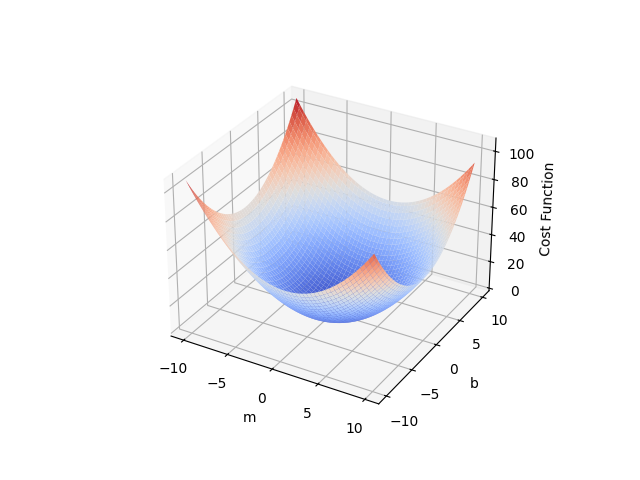

In [11]:
# Define your m, b values
M = np.linspace(-10, 10, 100)
B = np.linspace(-10, 10, 100)
M, B = np.meshgrid(M, B)


# Assuming you have defined x, y values
Z = cost_function(M, B, nrm_x, nrm_y)


# Normalize to a range of 0-1
norm = colors.Normalize(Z.min(), Z.max())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='coolwarm', norm=norm)

ax.view_init(elev=30, azim=-60) #the defult valeus
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Cost Function')

plt.show()

### 3.2 - Gradient Descent function

In [1]:
def gradient_Descent(X, Y, m=0, b=0, learning_rate=0.1, epochs=100):
    pd_logs = []
    mb_logs = [[m,b]]
    cost_logs = []    
    n = len(X)
    
    for i in range(epochs):
        
        dm,db = partial_derivatives(X, Y, m, b)
        pd_logs.append([dm, db])
        
        m = m - learning_rate * dm
        b = b - learning_rate * db
        mb_logs.append([m, b])
        
        cost = cost_function(m,b,X,Y)
        cost_logs.append(cost)
        
        if dm == 0 and db == 0:
            break
           
    return m, b , pd_logs, mb_logs ,cost_logs

m, b , pd_logs, mb_logs ,cost_logs = gradient_Descent(nrm_x, nrm_y, m=10, b=7, learning_rate=0.1, epochs=100)

mb_logs = np.array(mb_logs)

original_m = m * (np.std(Y) / np.std(X))
original_b = b * np.std(Y) + np.mean(Y) - original_m * np.mean(X)
print(f"m: {m}, b: {b}")
print(f"Original m: {original_m}, Original b: {original_b}")

NameError: name 'nrm_x' is not defined

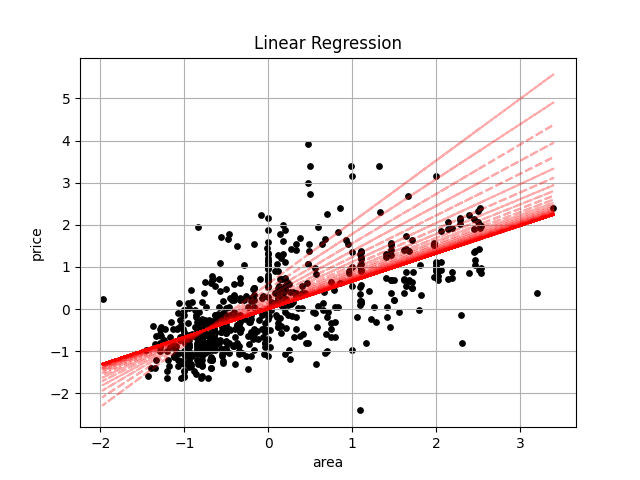

In [24]:

fig = plt.figure()

plt.scatter(nrm_x,nrm_y,c='black',s=15)
plt.plot(nrm_x, m*nrm_x + b,c="red")

ln =len(mb_logs)

for i in range(ln):

    if i > ln/10 :
        plt.plot(nrm_x, mb_logs[i][0]*nrm_x + mb_logs[i][1],c=f"#FF000055",linestyle='--')

plt.xlabel('area')
plt.ylabel('price')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

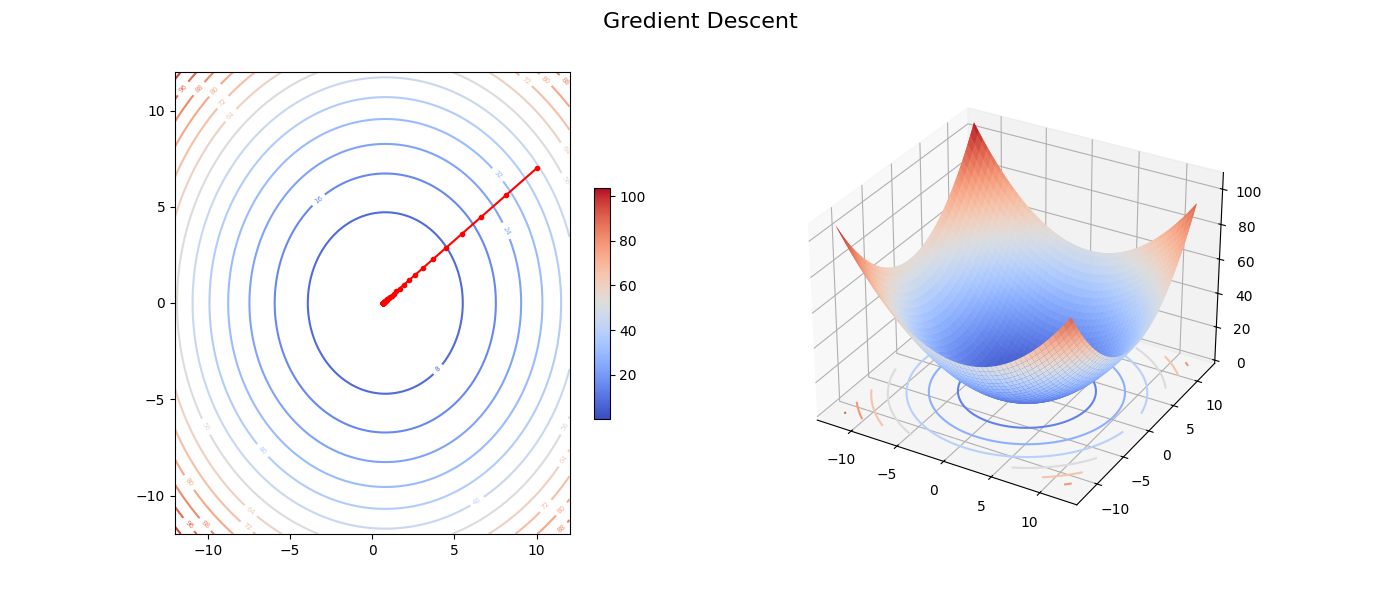

In [25]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Gredient Descent', fontsize=16)


M = np.linspace(-12, 12, 100)
B = np.linspace(-12, 12, 100)

M,B = np.meshgrid(M, B)

def f(m, b):
    return m**2 + b**2

ax1 = fig.add_subplot(121)
cs = ax1.contour(M, B, Z,levels=15, cmap='coolwarm')
ax1.clabel(cs, inline=True, fontsize=5)
ax1.plot(mb_logs[:,0],mb_logs[:,1], color='#FF0000' , marker='o', markersize=3)

ax2 = fig.add_subplot(122, projection='3d')

surf = ax2.plot_surface(M, B, Z, cmap="coolwarm")
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=15)

ax2.contour(M, B, Z, zdir='z', offset=0, cmap='coolwarm')

ax2.plot_surface(M, B, Z, cmap='coolwarm', norm=norm)

## 4- Prediction function

In [567]:
def pred(x):
    return original_m*x + original_b 